In [1]:
import os
import re
import pandas as pd

# 数据分析

In [2]:
# 数据提取 
def dataProcess(file_list):
    # f=open(file_list,'r',encoding='ANSI',errors = 'ignore')
    f=open(file_list,'r',encoding='gb2312',errors = 'ignore')
    text_lines = f
    dict_list = {}

    is_content = False
    for text in text_lines:
            from_ = re.findall(r'From:(.*?)\n', text)
            if from_ != []:
                # print(1)
                dict_list['from'] = str(from_[0])
            to_ = re.findall(r'To:(.*?)\n', text)
            if to_ != []:
                dict_list['to'] = str(to_[0])
            time_ = re.findall(r'Date:(.*?)\n', text)
            if time_ != []:
                dict_list['time'] = str(time_[0])
            text = text.strip()
            if not text:
               is_content = True
            if is_content:
                # print(text)
                if 'all_content' in dict_list:
                    dict_list['all_content'] += str(text)
                else:
                     dict_list['all_content'] = str(text)
#     dict_list['all_content']=[dict_list['all_content']]
#   处理缺失值查找键，如果不存在，返回unkown
    result_str = dict_list.get('from', 'unkown').replace(',', '').strip() + ","
    result_str += dict_list.get('to', 'unknown').replace(',', '').strip() + ","
    result_str += dict_list.get('time', 'unknown').replace(',', '').strip() + ","
    result_str += dict_list.get('all_content', 'unknown').replace(',', ' ').strip()
#     return result_str

 
    f.close()
#     print(dict_list)
    return result_str

In [44]:
list0 = os.listdir('../data')
list0.sort()
list0=list0[1:]


# 数据保存
def getindex():
    f = open('F:\Lijingling\-5实训一\垃圾邮件分类\data\index', encoding='utf-8')
    file_all=f.readlines()
    file_new=[]
#     sum=0
    for file in file_all:
#         sum+=1
        file_all[file_all.index(file)]=file[:-1]
        file=file.split()
        print('file[1]',file[1])
        file_new.append(file)
#         if sum==900:
#             break
    i=0
    data_all=[]
    for file in file_new:
        print(type(i))
        i=1+i
#         数据处理
        print(file)
        data=dataProcess(file[1])
        print(data)
        data_all.append(data)
        file1=file[1].split('/')
        print('file2')
        print(file1)
        print(i)
        if i%300==0:
            fi=open(r'process01_{}'.format(list0[int(i/300-1)]),'w',encoding='gb2312')
            for data in   data_all:
#                 print('i\n',i)
                 fi.write(str(data)+"\n")
            
            data_all=[]
            fi.close()
#         发现最后一个收件文件夹不是300个文件的，我们按300个文件保存一次
        if i==64620:
             fi=open(r'process01_{}'.format(list0[-1]),'w',encoding='gb2312')
            for data in   data_all:
#                 print('i\n',i)
                 fi.write(str(data)+"\n")
           
            data_all=[]
            fi.close()
           

    f.close()
    return data_all

In [3]:
data_all=getindex()

In [4]:
#合并数据到二维表
with open('result_process01', 'w', encoding='gb2312') as writer:
    i=0
    for l1 in list0[:-1]:
        file_path = 'process01_' + l1
        print("开始合并文件:" + file_path)
        
        with open(file_path, encoding='gb2312') as file:
             if index_key in index_dict:
                # 读取数据
                
                content_str = process_file(l2_path)
                # 添加标签
                content_str += "," + index_dict[index_key] + "\n"
                # 进行数据输出
                writer.writelines(content_str)
           i+=1
           if i==4:
                break
           for line in file:
                writer.writelines(line)

In [16]:
data = pd.read_csv('result_process01',encoding='gb2312', sep=',', header=None, names=['from', 'to', 'date', 'content','label'])
data

,from,to,date,content,label
0,Jake<(changsha)AI培训>,lu@ccert.edu.cn,Tue 30 Aug 2005 10:08:15 +0800,非财务纠淼牟莆窆芾?（沙盘模拟）------如何运用财务岳硖岣吖芾砑ㄐ?[课 程 背 景]每...,1.0
1,pan <pan@jdl.ac.cn>,shi@ccert.edu.cn,Sun 14 Aug 2005 10:16:47 +0800,讲的是孔子后人的故事。一个老领导回到家乡，跟儿子感情不和，跟贪财的孙子孔为本和睦。老领导的弟...,1.0
2,=?GB2312?B?1cW6o8TP?= <jian@163.con>,xing@ccert.edu.cn,Sun 14 Aug 2005 10:17:57 +0800,尊敬的贵公司(财务/经理)负责人您好！我是深圳金海实业有限公司（广州。东莞）等省市有分公司。...,1.0
3,=?GB2312?B?tPq/qreixrE=?= <pan@12.com>,pan@12.com,Sun 14 Aug 2005 10:19:02 +0800,贵公司负责人(经理/财务）您好：深圳市华龙公司受多家公司委托向外低点代开部分增值税电脑发票（...,1.0
4,mei <mei@dghhkjk.com>,=?GB2312?B?bWluZ3h1YW4=?=<china@dghhkjk.com>,Sun 14 Aug 2005 10:21:22 +0800,这是一封HTML格式信件！---------------------------------...,1.0
...,...,...,...,...,...
64315,=?GB2312?B?wfXOsNS0?= <ning@163.com>,ning@163.com,Sun 2 Oct 2005 23:59:09 +0800,贵公司负责人(经理/财务)您好：我公司是深圳市华源实业有限公司.本公司实力雄厚(全国各地均有...,1.0
64316,=?GB2312?B?08W73bT6v6q3osax?= <zhong@12.com>,zhong@12.com,Mon 3 Oct 2005 01:23:48 +0800,尊敬的商家朋友您好：我是深圳市裕华实业有限公司的。我司实力雄厚，有着良好的社会关系。也有部分...,1.0
64317,=?GB2312?B?0e7PyMn6?= <che@163.com>,zeng@ccert.edu.cn,Mon 3 Oct 2005 01:40:09 +0800,贵公司负责人(经理/财务）您好!我是深圳市康特实业有限公司，本公司在全国各地设有分公司（广州...,1.0
64318,zeng@126.com,long@ccert.edu.cn,Mon 3 Oct 2005 01:43:11 +0800,这是一个HTML格式的邮件FRAME: easymain,1.0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 5 columns):
from       64314 non-null object
to         64231 non-null object
date       64279 non-null object
content    63986 non-null object
label      64319 non-null float64
dtypes: float64(1), object(4)
memory usage: 2.5+ MB


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
import jieba

In [22]:
## 设置字符集，防止中文乱码
plt.rcParams['font.sans-serif']=[u'simHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
%matplotlib inline

# 特征工程
首先，看到上面的发件人和收件人都存在乱码，试着处理，去掉不是邮箱地址的乱码

In [25]:
def email_pro(str1):
    str2 = re.findall(r"@([A-Za-z0-9]*\.[A-Za-z0-9\.]+)", str(str1))
    result = '' 
    if str2 !=[]:
        result = str2[0]
    else:
        result = 'unknown'
    return result
data['to_address'] = pd.Series(map( email_pro, data['to']))
data['from_address'] = pd.Series(map(email_pro, data['from']))

                                     from  \
0                    Jake<(changsha)AI培训>   
1                     pan <pan@jdl.ac.cn>   
2    =?GB2312?B?1cW6o8TP?= <jian@163.con>   
3  =?GB2312?B?tPq/qreixrE=?= <pan@12.com>   
4                   mei <mei@dghhkjk.com>   
5       ke@163.com" <chunyang-sz@163.com>   
6                   hong <hong@jdl.ac.cn>   
7   =?GB2312?B?wbrPyMn6?= <jiang@tom.com>   
8                han <han@davidchans.com>   
9                     hou <hou@jdl.ac.cn>   

                                             to  \
0                               lu@ccert.edu.cn   
1                              shi@ccert.edu.cn   
2                             xing@ccert.edu.cn   
3                                    pan@12.com   
4  =?GB2312?B?bWluZ3h1YW4=?=<china@dghhkjk.com>   
5                                    ke@163.com   
6                               yu@ccert.edu.cn   
7                                 jiang@tom.com   
8                            han@davidchans.c

f:\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


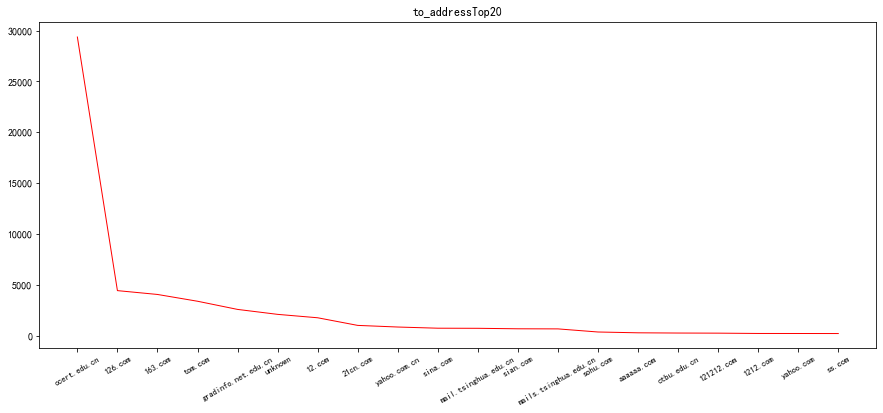

总邮件接收服务器类别数量为：1495
====================from address=======================
163.com                   7463
mail.tsinghua.edu.cn      6477
126.com                   5793
tom.com                   4053
mails.tsinghua.edu.cn     3185
unknown                   2094
12.com                    2054
cernet.com                1536
sohu.com                  1429
yahoo.com.cn              1368
21cn.com                  1161
jdl.ac.cn                  775
sina.com                   767
mail.nisac.gov.cn          669
hotmail.com                519
scan.ccert.edu.cn          516
yahoo.com                  489
ns.6test.edu.cn            452
sian.com                   437
stu.ee.tsinghua.edu.cn     420
Name: from_address, dtype: int64


f:\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


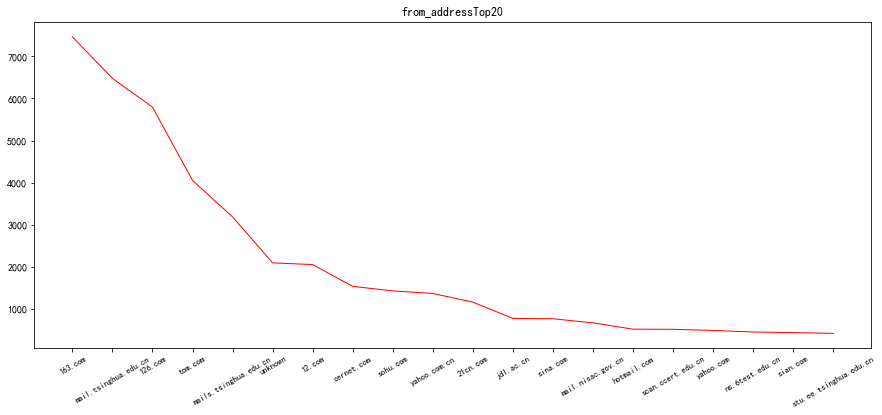

总邮件发送服务器类别数量为：3555
发送邮件数量小于100封的服务器数量为：3501
所有发送邮件情况
163.com                  7463
mail.tsinghua.edu.cn     6477
126.com                  5793
tom.com                  4053
mails.tsinghua.edu.cn    3185
Name: from_address, dtype: int64
所有正常邮件的发送状况
163.com                  2536
mail.tsinghua.edu.cn     2346
126.com                  2214
tom.com                  1394
mails.tsinghua.edu.cn    1186
unknown                   754
12.com                    711
Name: from_address, dtype: int64
所有异常邮件的发送状况
163.com                  4927
mail.tsinghua.edu.cn     4131
126.com                  3579
tom.com                  2659
mails.tsinghua.edu.cn    1999
12.com                   1343
unknown                  1340
Name: from_address, dtype: int64


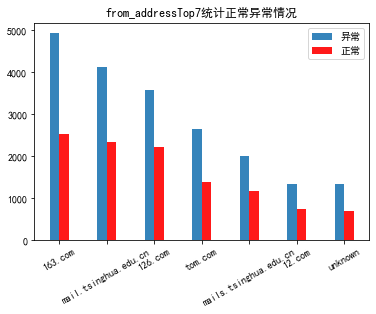

====星期属性字段的描述====
fri    10888
sat    10234
thu     9811
Name: date_week, dtype: int64
date_week  label
fri        0.0      5162
           1.0      5726
mon        0.0      2753
           1.0      5315
sat        0.0      3370
           1.0      6864
sep        1.0         1
sun        0.0      2480
           1.0      5864
thu        0.0      3755
           1.0      6056
tue        0.0      2894
           1.0      5244
unknown    0.0       146
           1.0       263
wed        0.0      2840
           1.0      5586
Name: label, dtype: int64
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
[5162, 2753, 3370, 2480, 3755, 2894, 146, 2840]
[5726, 5315, 6864, 5864, 6056, 5244, 263, 5586]


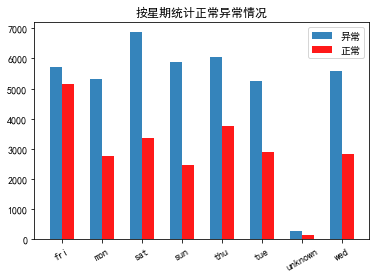

=====小时字段的描述======
19    2838
16    2780
15    2758
Name: date_hour, dtype: int64
date_hour  label
00         0.0      1070
           1.0      1528
01         0.0      1178
           1.0      1527
02         0.0      1146
           1.0      1446
03         0.0      1104
           1.0      1406
04         0.0       911
           1.0      1673
05         0.0       906
           1.0      1693
06         0.0       734
           1.0      1759
07         0.0       872
           1.0      1749
08         0.0       857
           1.0      1665
09         0.0      1040
           1.0      1651
10         0.0      1173
           1.0      1556
11         0.0      1152
           1.0      1519
12         0.0      1047
           1.0      1633
13         0.0      1103
           1.0      1519
14         0.0      1008
           1.0      1694
15         0.0       940
           1.0      1818
16         0.0       882
           1.0      1898
17         0.0       791
           1.0      1952
1

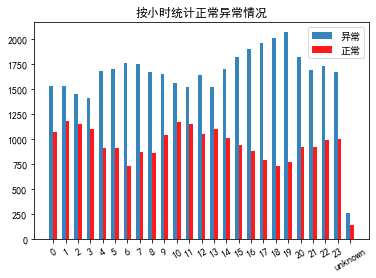

In [28]:
print(data.head(10))

#特征工程1 => 查看邮件服务器的数量 进行探索性分析

print('====================to address=======================')
to_address=data.to_address.value_counts().head(20)
print(to_address)

pla=plt.figure(figsize=(15,6))
ax = pla.add_subplot(1, 1, 1)
ax.plot(to_address.index,to_address.values,color="red",linewidth=1 )
ax.set_xticklabels(to_address.index, rotation=30, fontsize='small')
plt.title('to_addressTop20')
plt.show()
# print(str(data.to_address.unique().shape[0]))
print('总邮件接收服务器类别数量为：' + str(data.to_address.unique().shape[0]))
print('====================from address=======================')
from_address=data.from_address.value_counts().head(20)
print(from_address)

pla=plt.figure(figsize=(15,6))
ax = pla.add_subplot(1, 1, 1)
ax.plot(from_address.index,from_address.values,color="red",linewidth=1 )
ax.set_xticklabels(from_address.index, rotation=30, fontsize='small')
plt.title('from_addressTop20')
plt.show()
print('总邮件发送服务器类别数量为：' + str(data.from_address.unique().shape[0]))
from_address_df = data.from_address.value_counts().to_frame()
len_less_10_from_address_count = from_address_df[from_address_df.from_address <= 100].shape[0]
print('发送邮件数量小于100封的服务器数量为：' + str(len_less_10_from_address_count))



# 查看一下发送邮件最多的五个运营商所发送的所有邮件中的正常邮件和异常邮件的比例情况
print('所有发送邮件情况')
from_address_all=data.from_address.value_counts().head(5)
print(from_address_all)
print('所有正常邮件的发送状况')
from_address_yes=data[data.label == 0.0].from_address.value_counts().head(7)
print(from_address_yes)
print('所有异常邮件的发送状况')
from_address_no=data[data.label == 1.0].from_address.value_counts().head(7)
print(from_address_no)

x = np.arange(len(from_address_yes.index))
width = 0.2    #设置柱与柱之间的宽度
fig,ax = plt.subplots()
ax.bar(x,from_address_no.values,width,alpha = 0.9,label='异常')
ax.bar(x+width,from_address_yes.values,width,alpha = 0.9,color= 'red',label='正常')
ax.set_xticks(x +width/2)#将坐标设置在指定位置
ax.set_xticklabels(from_address_no.index,rotation=30)#将横坐标替换成
plt.title('from_addressTop7统计正常异常情况')
plt.legend()
plt.show()


# 基于上一个的描述信息，我们认为如果发送的邮箱是：163.com, 126.com, tom.com, 12.com, unknown
# 有较大的概率为垃圾邮件
# 如果发送邮箱是：mail.tsinghua.edu.cn\mails.tsinghua.edu.cn\cernet.com，我们是正常的邮件
# 所以这里根据邮箱的发送运营商，构建一些新的特征    匹配到显示1，没匹配到显示0
data['from_12'] = pd.Series(map(lambda s: int(s == '12.com'), data['from_address']))
data['from_163'] = pd.Series(map(lambda s: int(s == '163.com'), data['from_address']))
data['from_126'] = pd.Series(map(lambda s: int(s == '126.com'), data['from_address']))
data['from_tom'] = pd.Series(map(lambda s: int(s == 'tom.com'), data['from_address']))
data['from_unknown'] = pd.Series(map(lambda s: int(s == 'unknown'), data['from_address']))
data['from_tsinghua'] = pd.Series(map(lambda s: int(s == 'mail.tsinghua.edu.cn' or s == 'mails.tsinghua.edu.cn'), data['from_address']))
data['from_cernet'] = pd.Series(map(lambda s: int(s == 'cernet.com'), data['from_address']))
data.head(2)


# 特征工程2 =>邮件的时间提取  时间是很重要的，很少有人在晚上发邮件，当然，北半球和南半球的人除外
# 3. 特征工程2 => 时间提取
def extract_email_date(str1):
    if not isinstance(str1, str):
        str1 = str(str1)

    str_len = len(str1)
    week = ""
    hour = ""
    # 0表示上午[8,12]，1表示下午[13,18],2表示晚上[19,23],3表示凌晨[0,7]
    time_quantum = ""

    if str_len < 10:
        # unknown
        week = "unknown"
        hour = "unknown"
        time_quantum = "unknown"
    elif str_len == 16:
        # 2005-9-2 上午10:55, 2005-9-2 上午11:04
        rex = r"(\d{2}):\d{2}"
        it = re.findall(rex, str1)
        if len(it) == 1:
            hour = it[0]
        else:
            hour = "unknown"
        week = "Fri"
        time_quantum = "0"
    elif str_len == 19:
        # Sep 23 2005 1:04 AM
        week = "Sep"
        hour = "01"
        time_quantum = "3"
    elif str_len == 21:
        # August 24 2005 5:00pm
        week = "Wed"
        hour = "17"
        time_quantum = "1"
    else:
        rex = r"([A-Za-z]+\d?[A-Za-z]*) .*?(\d{2}):\d{2}:\d{2}.*"
        it = re.findall(rex, str1)
        if len(it) == 1 and len(it[0]) == 2:
            week = it[0][0][-3:]
            hour = it[0][1]
            int_hour = int(hour)
            if int_hour < 8:
                time_quantum = "3"
            elif int_hour < 13:
                time_quantum = "0"
            elif int_hour < 19:
                time_quantum = "1"
            else:
                time_quantum = "2"
        else:
            week = "unknown"
            hour = "unknown"
            time_quantum = "unknown"

    week = week.lower()
    hour = hour.lower()
    time_quantum = time_quantum.lower()
    return (week, hour, time_quantum)

# 数据转换
date_time_extract_result = list(map(lambda st: extract_email_date(st),data['date']))
data['date_week'] = pd.Series(map(lambda t: t[0], date_time_extract_result))
data['date_hour'] = pd.Series(map(lambda t: t[1], date_time_extract_result))
data['date_time_quantum'] = pd.Series(map(lambda t: t[2], date_time_extract_result))
data.head(1)


print('====星期属性字段的描述====')
print(data.date_week.value_counts().head(3))
date_week_count=data[['date_week', 'label']].groupby(['date_week','label'])['label'].count()
print(date_week_count)
del date_week_count[('sep',1.0)]
y_1=[]
y_2=[]
for i in range(len(date_week_count)):
    print(i)

    if i%2==0 :   #正常常
        y_1.append(date_week_count[i])

    if i%2!=0:   #异常常
        y_2.append(date_week_count[i])
print(y_1)
print(y_2)
x = np.arange(len(y_2))
width = 0.3    #设置柱与柱之间的宽度
fig,ax = plt.subplots()
ax.bar(x,y_2,width,alpha = 0.9,label='异常')
ax.bar(x+width,y_1,width,alpha = 0.9,color= 'red',label='正常')
ax.set_xticks(x +width/2)#将坐标设置在指定位置
x_l=['fri','mon','sat','sun','thu','tue','unknown','wed']
ax.set_xticklabels(x_l,rotation=30)#将横坐标替换成
plt.title('按星期统计正常异常情况')
plt.legend()
plt.show()


# 小时数据对垃圾邮件内容是否有解释作用
print('=====小时字段的描述======')
print(data.date_hour.value_counts().head(3))
date_hour_count=data[['date_hour','label']].groupby(['date_hour','label'])['label'].count()
print(date_hour_count)
# del date_hour_count[:,0.0]
y_1=list(date_hour_count[:,1.0].values)   #异常1
# del y_1[-2]
y_2=list(date_hour_count[:,0.0].values)    #正常0
y_2.remove(1)
print(y_1)
print(y_2)
x = np.arange(len(y_2))
width = 0.3    #设置柱与柱之间的宽度
fig,ax = plt.subplots()
ax.bar(x,y_1,width,alpha = 0.9,label='异常')
ax.bar(x+width,y_2,width,alpha = 0.9,color= 'red',label='正常')
ax.set_xticks(x +width/2)#将坐标设置在指定位置
x_l=['fri','mon','sat','sun','thu','tue','unknown','wed']
x_label=[]
for i in range(len(x)):
    if i<24:
        x_label.append(str(x[i]))

    if i==24:
        x_label.append('unknown')
ax.set_xticklabels(x_label,rotation=30)#将横坐标替换成
plt.title('按小时统计正常异常情况')
plt.legend()
plt.show()





In [29]:
# 处理大头，文件内容处理

## 将文本类型全部转换为str类型，然后进行分词操作
data['content'] = data['content'].astype('str')
# jieba添加分词字典 jieba.load_userdict("userdict.txt")
data['jieba_cut_content'] = list(map(lambda st: "  ".join(jieba.cut(st)), data['content']))


## 特征工程四 ==> 邮件长度对是否是垃圾邮件的影响
def process_content_length(lg):
    if lg <= 10:
        return 10
    elif lg <= 100:
        return 100
    elif lg <= 500:
        return 500
    elif lg <= 1000:
        return 1000
    elif lg <= 1500:
        return 1500
    elif lg <= 2000:
        return 2000
    elif lg <= 2500:
        return 2500
    elif lg <= 3000:
        return 3000
    elif lg <= 4000:
        return 4000
    elif lg <= 5000:
        return 5000
    elif lg <= 10000:
        return 10000
    elif lg <= 20000:
        return 20000
    elif lg <= 30000:
        return 30000
    elif lg <= 50000:
        return 50000
    else:
        return 888888


data['content_length'] = pd.Series(map(lambda st: len(st), data['content']))
data['content_length_type'] = pd.Series(map(lambda st: process_content_length(st), data['content_length']))




Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Public\Documents\Wondershare\CreatorTemp\jieba.cache
Loading model cost 0.720 seconds.
Prefix dict has been built successfully.


In [53]:
# 查看一下各个长度区间段中，正常邮件和异常邮件的样本数目
df21 = data.groupby(['content_length_type', 'label'])['label'].agg(['count'])
# df21 = data.groupby(['content_length_type', 'label'])['label'].count(['count'])
print(type(df21))
# print(df21.query('label==1.0'))
print(df21)
# y_1=list(df21.query('label==1.0'))   #异常1
# # del y_1[-2]
# y_2=list(df21.query('label==0.0'))    #正常0
# y_2.remove(1)
y_1=[]
y_2=[]

<class 'pandas.core.frame.DataFrame'>
                           count
content_length_type label       
10                  0.0      178
                    1.0      308
100                 0.0     1411
                    1.0     2612
500                 0.0    14939
                    1.0    26124
1000                0.0     3101
                    1.0     5287
1500                0.0     1163
                    1.0     1974
2000                0.0      689
                    1.0     1253
2500                0.0      481
                    1.0      864
3000                0.0      418
                    1.0      711
4000                0.0      438
                    1.0      788
5000                0.0      185
                    1.0      353
10000               0.0      282
                    1.0      444
20000               0.0       89
                    1.0      157
30000               0.0       19
                    1.0       40
50000               0.0        7
     

In [30]:



df23=df21.values.tolist()
print(df23)
for i in range(len(df23)):
    if i%2==0:    #正常
        y_2.append(df23[i][0])

    else:     #异常  
        y_1.append(df23[i][0])
print(y_1)
print(y_2)
x = np.arange(len(y_2))
width = 0.3    #设置柱与柱之间的宽度
fig,ax = plt.subplots()
ax.bar(x,y_1,width,alpha = 0.9,label='spam')
ax.bar(x+width,y_2,width,alpha = 0.9,color= 'red',label='ham')
ax.set_xticks(x +width/2)#将坐标设置在指定位置
x_label=[]
for i in range(len(x)):
    if i<15:
        x_label.append(str(x[i]))

    if i==15:
        x_label.append('>50000')
ax.set_xticklabels(x_label)#将横坐标替换成
plt.xlabel('长度比例')
plt.ylabel('邮件数量')
plt.title('按内容长度统计正常异常情况')
plt.legend()
plt.show()


NameError: name 'df21' is not defined

    content_length_type     c1     c2  c1_percentage  c2_percentage  \
0                    10    308    178       0.633745       0.366255   
1                   100   2612   1411       0.649267       0.350733   
2                   500  26124  14939       0.636193       0.363807   
3                  1000   5287   3101       0.630305       0.369695   
4                  1500   1974   1163       0.629264       0.370736   
5                  2000   1253    689       0.645211       0.354789   
6                  2500    864    481       0.642379       0.357621   
7                  3000    711    418       0.629761       0.370239   
8                  4000    788    438       0.642741       0.357259   
9                  5000    353    185       0.656134       0.343866   
10                10000    444    282       0.611570       0.388430   
11                20000    157     89       0.638211       0.361789   
12                30000     40     19       0.677966       0.322034   
13    

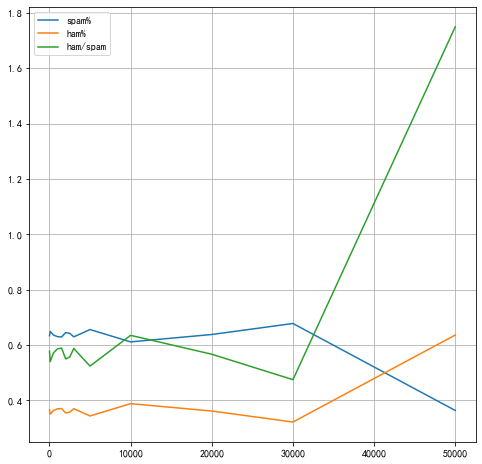

In [55]:
df2 = df21.reset_index()
# 获取垃圾邮件的数据
df3 = df2[df2.label == 1][['content_length_type', 'count']].rename(columns = {'count': "c1"})
# 获取正常邮件的数据
df4 = df2[df2.label == 0][['content_length_type', 'count']].rename(columns = {'count': "c2"})
# 合并数据
df5 = pd.merge(df3, df4)
# 计算数据占比情况
df5['c1_percentage'] = df5.apply(lambda r: r['c1']/(r['c1']+r['c2']), axis=1)
df5['c2_percentage'] = df5.apply(lambda r: r['c2']/(r['c1']+r['c2']), axis=1)
df5['c3_percentage'] = df5.apply(lambda r: r['c2']/(r['c1']), axis=1)
print(df5)
# 画图
plt.figure(figsize=(8,8))
plt.plot(df5['content_length_type'], df5['c1_percentage'], label=u'spam%',)
plt.plot(df5['content_length_type'], df5['c2_percentage'], label=u'ham%',)
plt.plot(df5['content_length_type'], df5['c3_percentage'], label=u'ham/spam',)
plt.grid(True)
plt.legend(loc=0)
plt.show()

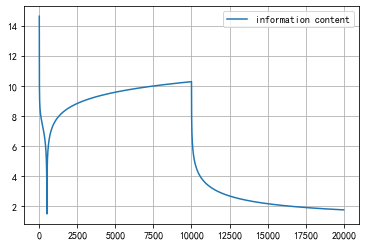

,from,to,date,content,label,to_address,from_address,from_12,from_163,from_126,...,from_unknown,from_tsinghua,from_cernet,date_week,date_hour,date_time_quantum,jieba_cut_content,content_length,content_length_type,content_signal
0,Jake<(changsha)AI培训>,lu@ccert.edu.cn,Tue 30 Aug 2005 10:08:15 +0800,非财务纠淼牟莆窆芾?（沙盘模拟）------如何运用财务岳硖岣吖芾砑ㄐ?[课 程 背 景]每...,1.0,ccert.edu.cn,unknown,0,0,0,...,1,0,0,tue,10,0,非 财务 纠淼 牟 莆 窆 芾 ? （ 沙盘 模拟 ） ------...,1839,2000,8.484431
1,pan <pan@jdl.ac.cn>,shi@ccert.edu.cn,Sun 14 Aug 2005 10:16:47 +0800,讲的是孔子后人的故事。一个老领导回到家乡，跟儿子感情不和，跟贪财的孙子孔为本和睦。老领导的弟...,1.0,ccert.edu.cn,jdl.ac.cn,0,0,0,...,0,0,0,sun,10,0,讲 的 是 孔子 后人 的 故事 。 一个 老 领导 回到 家乡 ...,193,500,7.486084


In [56]:
## 特征工程四 ==> 添加信息量
# 根据内容长度对于垃圾邮件和正常邮件比例的影响，自己构建一个特征属性
def process_content_signal(x):
    if x > 10000:
        return 0.5 / np.exp(np.log10(x) - np.log10(500)) + np.log(abs(x - 500) + 1) - np.log(abs(x - 10000)) + 1
    else:
        return 0.5 / np.exp(np.log10(x) - np.log10(500)) + np.log(abs(x - 500) + 1) + 1

a = np.arange(1,20000)
plt.plot(a, list(map(lambda t: process_content_signal(t), a)), label=u'information content')
plt.grid(True)
plt.legend(loc = 0)
plt.show()

data['content_signal']  = list(map(lambda st: process_content_signal(st), data['content_length']))
data.head(2)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 21 columns):
from                   64314 non-null object
to                     64231 non-null object
date                   64279 non-null object
content                64320 non-null object
label                  64319 non-null float64
to_address             64320 non-null object
from_address           64320 non-null object
from_12                64320 non-null int64
from_163               64320 non-null int64
from_126               64320 non-null int64
from_tom               64320 non-null int64
from_unknown           64320 non-null int64
from_tsinghua          64320 non-null int64
from_cernet            64320 non-null int64
date_week              64320 non-null object
date_hour              64320 non-null object
date_time_quantum      64320 non-null object
jieba_cut_content      64320 non-null object
content_length         64320 non-null int64
content_length_type    64320 non-null int64

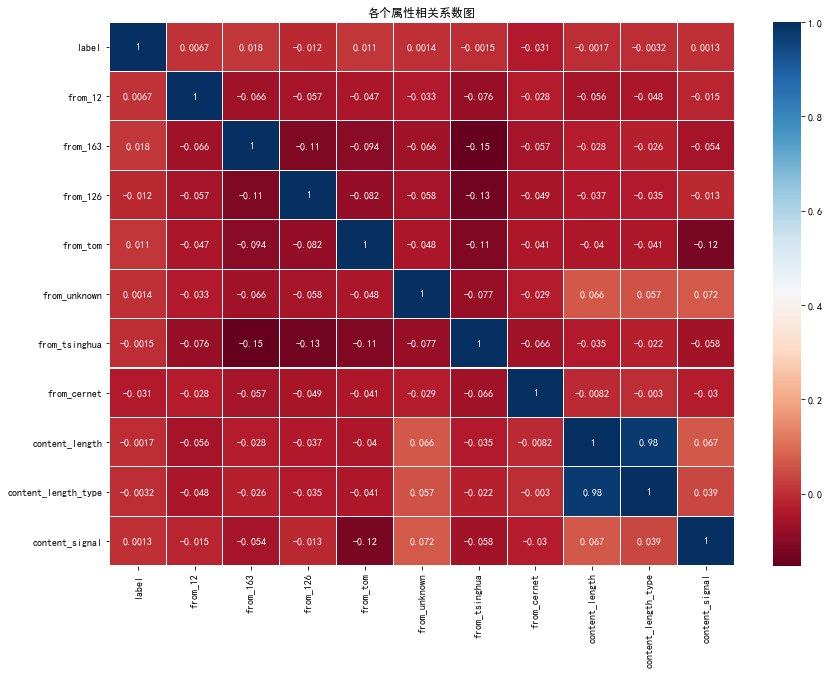

In [58]:
f, ax= plt.subplots(figsize = (14, 10))
corr = data.corr()
import seaborn as sns
# print(corr)
sns.heatmap(corr,cmap='RdBu',annot=True, linewidths = 0.05, ax = ax)


# 设置Axes的标题
ax.set_title('各个属性相关系数图')
plt.show()
plt.close()
f.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')

In [59]:
#inplace: 设置为True表示，在原对象上进行直接操作，设置为False，表示对原对象不变，意味着，如果设置为False，你需要
# 新建一个dataframe来接受drop后的信息。
data.drop(['from', 'to', 'date', 'content', 'to_address', 'from_address', 'date_hour', 'date_time_quantum','content_signal','content_length_type','content_length'], axis = 1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64320 entries, 0 to 64319
Data columns (total 10 columns):
label                64319 non-null float64
from_12              64320 non-null int64
from_163             64320 non-null int64
from_126             64320 non-null int64
from_tom             64320 non-null int64
from_unknown         64320 non-null int64
from_tsinghua        64320 non-null int64
from_cernet          64320 non-null int64
date_week            64320 non-null object
jieba_cut_content    64320 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 4.9+ MB


In [60]:
#发现label存在缺失值，有且只有一个，所以直接删除
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64319 entries, 0 to 64319
Data columns (total 10 columns):
label                64319 non-null float64
from_12              64319 non-null int64
from_163             64319 non-null int64
from_126             64319 non-null int64
from_tom             64319 non-null int64
from_unknown         64319 non-null int64
from_tsinghua        64319 non-null int64
from_cernet          64319 non-null int64
date_week            64319 non-null object
jieba_cut_content    64319 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 5.4+ MB


In [61]:
#看一下数值类型特征的相关信息
data.describe().T
#查看一下相关系数
data.corr()

,label,from_12,from_163,from_126,from_tom,from_unknown,from_tsinghua,from_cernet
label,1.000000,0.006666,0.018075,-0.012016,0.010710,0.001424,-0.001524,-0.031366
from_12,0.006666,1.000000,-0.065803,-0.057142,-0.047101,-0.033318,-0.076364,-0.028409
from_163,0.018075,-0.065803,1.000000,-0.113985,-0.093955,-0.066462,-0.152328,-0.056669
from_126,-0.012016,-0.057142,-0.113985,1.000000,-0.081589,-0.057714,-0.132278,-0.049210
from_tom,0.010710,-0.047101,-0.093955,-0.081589,1.000000,-0.047573,-0.109034,-0.040563
from_unknown,0.001424,-0.033318,-0.066462,-0.057714,-0.047573,1.000000,-0.077129,-0.028693
from_tsinghua,-0.001524,-0.076364,-0.152328,-0.132278,-0.109034,-0.077129,1.000000,-0.065764
from_cernet,-0.031366,-0.028409,-0.056669,-0.049210,-0.040563,-0.028693,-0.065764,1.000000


In [62]:
data.head(5)

,label,from_12,from_163,from_126,from_tom,from_unknown,from_tsinghua,from_cernet,date_week,jieba_cut_content
0,1.0,0,0,0,0,1,0,0,tue,非 财务 纠淼 牟 莆 窆 芾 ? （ 沙盘 模拟 ） ------...
1,1.0,0,0,0,0,0,0,0,sun,讲 的 是 孔子 后人 的 故事 。 一个 老 领导 回到 家乡 ...
2,1.0,0,0,0,0,0,0,0,sun,尊敬 的 贵 公司 ( 财务 / 经理 ) 负责人 您好 ！ 我 ...
3,1.0,1,0,0,0,0,0,0,sun,贵 公司 负责人 ( 经理 / 财务 ） 您好 ： 深圳市 华龙 公...
4,1.0,0,0,0,0,0,0,0,sun,这是 一封 HTML 格式 信件 ！ ---------------------...


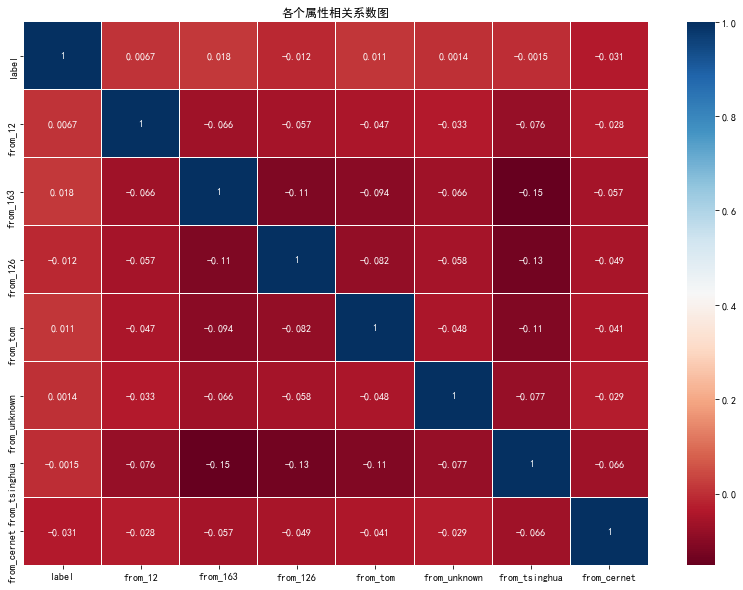

In [63]:
f, ax= plt.subplots(figsize = (14, 10))
corr = data.corr()
import seaborn as sns
# print(corr)
sns.heatmap(corr,cmap='RdBu',annot=True, linewidths = 0.05, ax = ax)


# 设置Axes的标题
ax.set_title('各个属性相关系数图')
plt.show()
plt.close()
f.savefig('sns_style_origin.jpg', dpi=100, bbox_inches='tight')

number of numeric features: 8
number of categorical features: 2


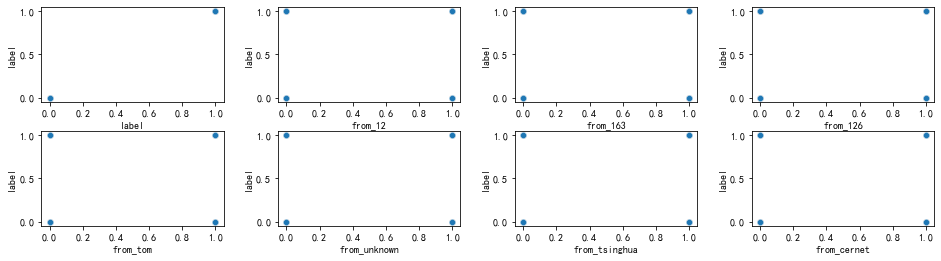

In [64]:
#分离数字特征和类别特征
num_features = []
cate_features = []
for col in data.columns:
    if data[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('number of numeric features:', len(num_features))
print('number of categorical features:', len(cate_features))
#查看数字特征与目标值的关系
plt.figure(figsize=(16, 20))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i, feature in enumerate(num_features):
    plt.subplot(9, 4, i+1)
    sns.scatterplot(x=feature, y='label', data=data, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('label')
plt.show()

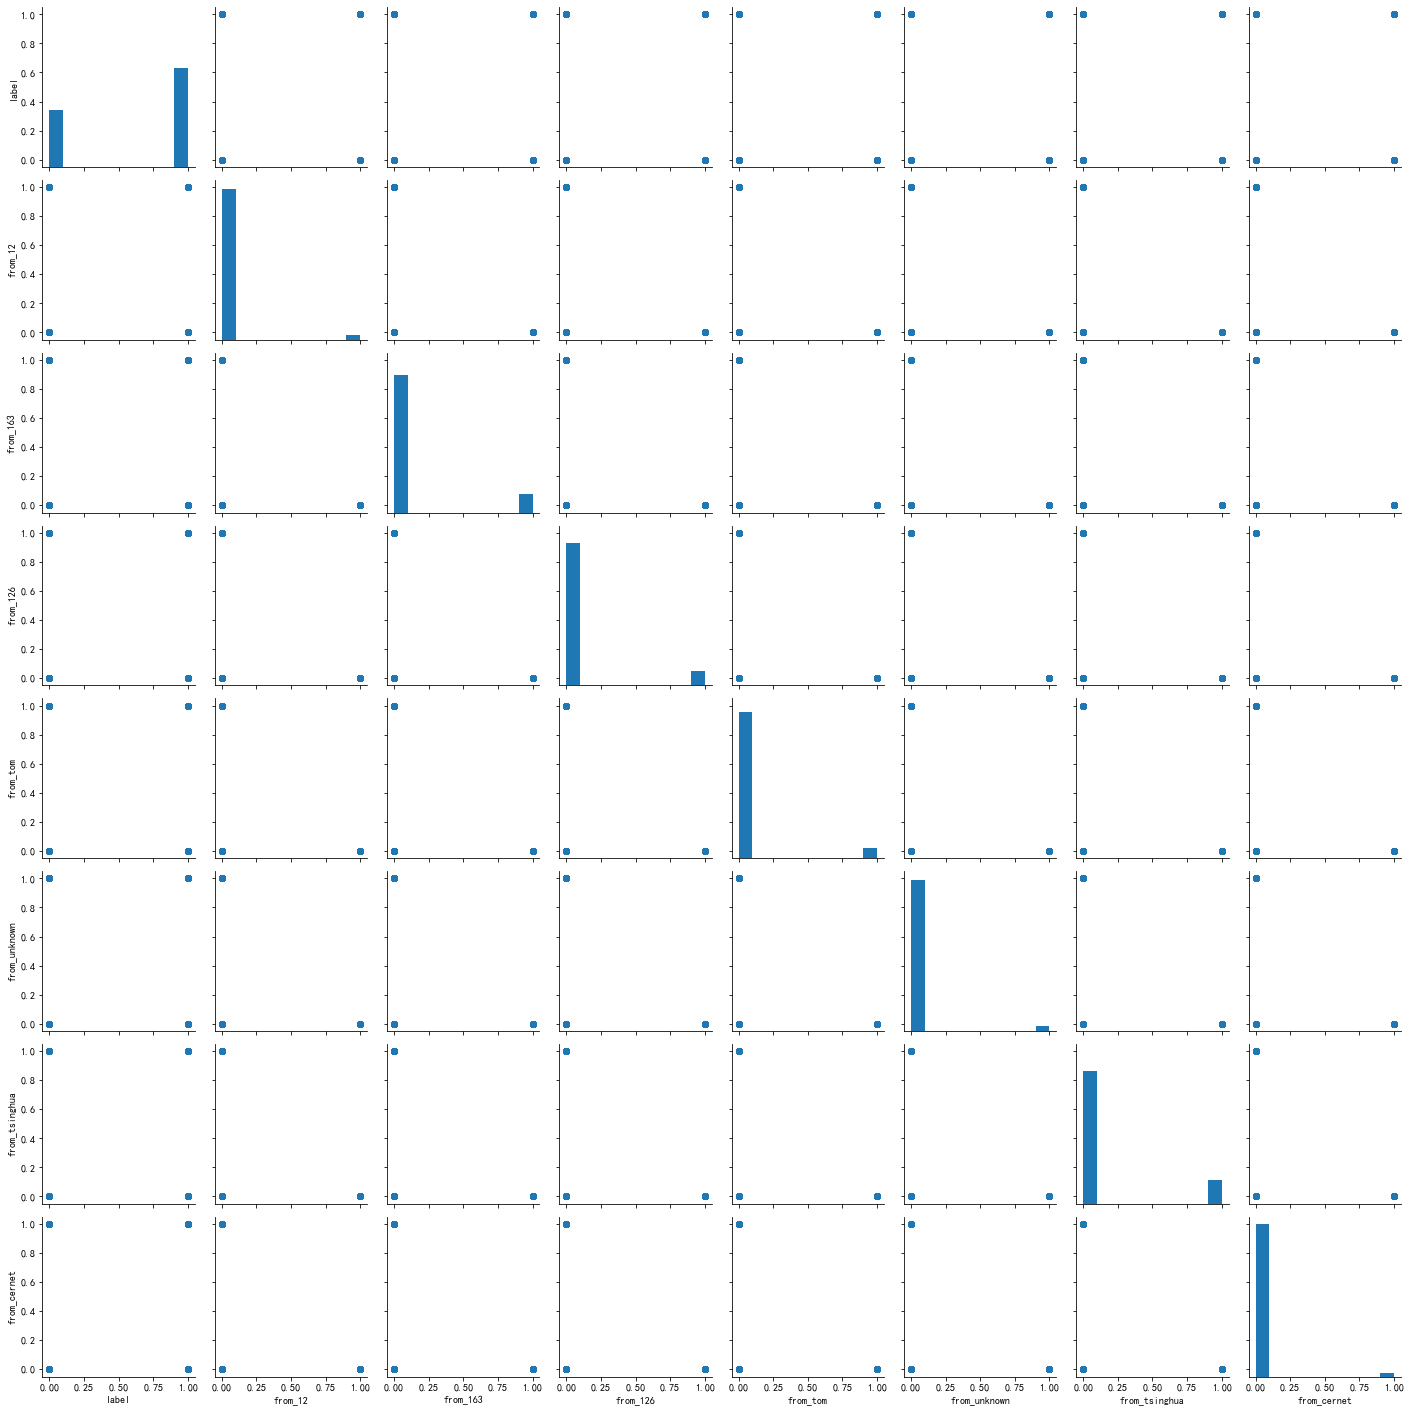

In [65]:

g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)